# Confidence Interval

> [original source](https://inferentialthinking.com/chapters/13/3/Confidence_Intervals.html)

> [data](https://raw.githubusercontent.com/data-8/textbook/main/assets/data/baby.csv)

We will now use the bootstrap method to estimate an unknown population median. You have encountered the dataset before. It comes from a sample of newborns in a large hospital system. we will treat it as if it were a simple random sample though the sampling was done in multiple stages. Stat Labs by Deborah Nolan and Terry Speed has details about a larger dataset from which this set is drawn.

The table births contains the following variables for mother-baby pairs: the baby’s birth weight in ounces, the number of gestational days (the number of days the mother was pregnant), the mother’s age in completed years, the mother’s height in inches, pregnancy weight in pounds, and whether or not the mother smoked during pregnancy.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [98]:
births = pd.read_csv('baby.csv')

In [99]:
births.head()

,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,120,284,27,62,100,False
1,113,282,33,64,135,False
2,128,279,28,64,115,True
3,108,282,23,67,125,True
4,136,286,25,62,93,False


Birth weight is an important factor in the health of a newborn infant. Smaller babies tend to need more medical care in their first days than larger newborns. It is therefore helpful to have an estimate of birth weight before the baby is born. One way to do this is to examine the relationship between birth weight and the number of gestational days.

A simple measure of this relationship is the ratio of birth weight to the number of gestational days. The table ratios contains the first two columns of baby, as well as a column of the ratios. The first entry in that column was calculated as follows:

 
$$
\frac{120\ ounces}{284\ days}\approx 0.4225\ ounces\ per\ day
$$

In [100]:
ratios = births['Birth Weight']/births['Gestational Days']
ratios = pd.DataFrame(ratios)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

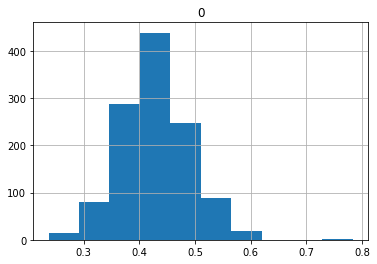

In [101]:
ratios.hist()

At first glance the histogram looks quite symmetric, with the density at its maximum over the interval 0.4 ounces per day to 0.45 ounces per day. But a closer look reveals that some of the ratios were quite large by comparison. The maximum value of the ratios was just over 0.78 ounces per day, almost double the typical value.

The median gives a sense of the typical ratio because it is unaffected by the very large or very small ratios. The median ratio in the sample is about 0.429 ounces per day.

In [102]:
np.percentile(ratios,50)

0.42907801418439717

But what was the median in the population? We don’t know, so we will estimate it.

Our method will be exactly the same as in the previous section. We will bootstrap the sample 5,000 times resulting in 5,000 estimates of the median. Our 95% confidence interval will be the “middle 95%” of all of our estimates.

## Constructing a Bootstrap Confidence Interval

We will start by defining a function one_bootstrap_median. It will bootstrap the sample and return one the median ratio in the bootstrapped sample.

In [103]:
class Boot:
    def __init__(self, size: int):
        self.size = size

    def single_bootstrap_median(self, df: pd.DataFrame):
        resample = df.sample(self.size, replace=True)
        return np.percentile(resample, 50)

    def bootstrap(self, df: pd.DataFrame, func):
        result = np.zeros(self.size)
        for i in range(self.size):
            result[i] = func(df)
        return result

    def bootstrap_median(self, df: pd.DataFrame):
        medians = np.zeros(self.size)
        for i in range(self.size):
            medians[i] = self.single_bootstrap_median(df)
        return medians

In [104]:
bootstrap_size = 5000
b = Boot(bootstrap_size)
bstrap_medians = b.bootstrap_median(ratios)

(array([   4.,    2.,   16.,  230., 1506., 1503., 1081.,  595.,   55.,
           8.]),
 array([0.42574257, 0.42631213, 0.42688168, 0.42745124, 0.4280208 ,
        0.42859035, 0.42915991, 0.42972946, 0.43029902, 0.43086857,
        0.43143813]),
 <BarContainer object of 10 artists>)

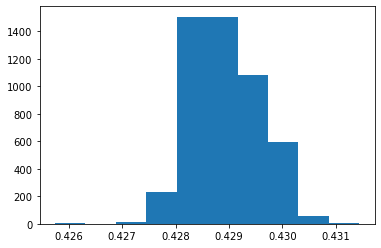

In [105]:
plt.hist(bstrap_medians)

In [106]:
# Get the endpoints of the 95% confidence interval
left = np.percentile(bstrap_medians, 2.5)
right = np.percentile(bstrap_medians, 97.5)

(left, right)

(0.427536231884058, 0.43014705882352944)

The 95% confidence interval goes from about 0.425 ounces per day to about 0.433 ounces per day. We are estimating the median “birth weight to gestational days” ratio in the population is somewhere in the interval 0.425 ounces per day to 0.433 ounces per day.

The estimate of 0.429 based on the original sample happens to be half-way in between the two ends of the interval, though that need not be true in general.

To visualize our results, let us draw the empirical histogram of our bootstrapped medians and place the confidence interval on the horizontal axis.

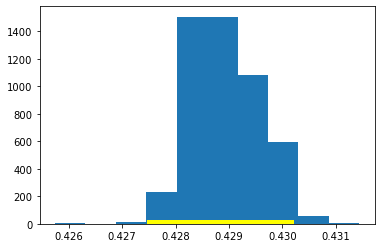

In [107]:
plt.hist(bstrap_medians)
plt.plot([left,right],[0,0],color='yellow',lw=8)

This histogram and interval resembles those we drew in the previous section, with one big difference – there is no green dot showing where the parameter is. We don’t know where that dot should be, or whether it is even in the interval.

We just have an interval of estimates. It is a 95% confidence interval of estimates, because the process that generates it produces a good interval about 95% of the time. That certainly beats guessing the ratio at random!

Keep in mind that this interval is an approximate 95% confidence interval. There are many approximations involved in its computation. The approximation is not bad, but it is not exact.

## 13.3.2. Estimating a Population Average

What we have done for medians can be done for averages as well. Suppose we want to estimate the average age of the mothers in the population. A natural estimate is the average age of the mothers in the sample. Here is the distribution of their ages, and their average age which was about 27.2 years.

<AxesSubplot:>

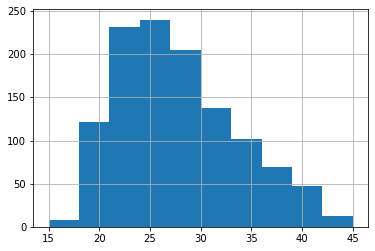

In [108]:
births['Maternal Age'].hist()

In [109]:
np.mean(births['Maternal Age'])

27.228279386712096

What was the average age of the mothers in the population? We don’t know the value of this parameter.

Let’s estimate the unknown parameter by the bootstrap method. To do this, we will adapt the code for bootstrap_median to instead define the function bootstrap_mean. The code is the same except that the statistics are means (that is, averages) instead of medians, and are collected in an array called bstrap_means instead of bstrap_medians.

In [119]:
def one_bootstrap_mean(df: pd.DataFrame):
    resample = df.sample(len(df), replace=True)
    return np.average(resample['Maternal Age'])


b2 = Boot(bootstrap_size)
bstrap_means = b2.bootstrap(births, one_bootstrap_mean)


In [120]:
bstrap_means

array([26.96422487, 27.19080068, 27.35264055, ..., 27.03918228,
       27.44633731, 27.41737649])

In [121]:
# Get the endpoints of the 95% confidence interval
left = np.percentile(bstrap_means, 2.5)
right = np.percentile(bstrap_means, 97.5)

(left, right)

(26.89778534923339, 27.556218057921637)

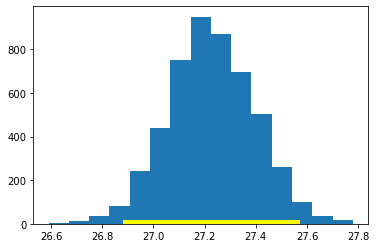

In [122]:
plt.hist(bstrap_means, bins=15)
plt.plot([left, right],[0,0],color='yellow',lw=8)

## Estimating a Population Proportion

In the sample, 39% of the mothers smoked during pregnancy.

In [131]:
(births['Maternal Smoker']==True).sum()/len(births)

0.3909710391822828

In [132]:
np.count_nonzero(births['Maternal Smoker'])/len(births)

0.3909710391822828

In [133]:
def one_bootstrap_proportion(df: pd.DataFrame):
    resample = df.sample(bootstrap_size, replace=True)
    smoking = resample['Maternal Smoker']
    return np.count_nonzero(smoking) / len(smoking)

b3 = Boot(bootstrap_size)
bstrap_proportions = b3.bootstrap(births, one_bootstrap_proportion)


In [134]:
# Get the endpoints of the 95% confidence interval
left = np.percentile(bstrap_proportions, 2.5)
right = np.percentile(bstrap_proportions, 97.5)

(left, right)

(0.3776, 0.4042049999999999)

The confidence interval goes from about 36% to about 42%.

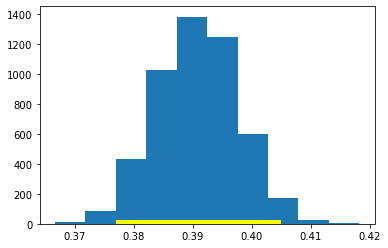

In [135]:
plt.hist(bstrap_proportions)
plt.plot([left, right],[0,0],color='yellow',lw=8)

13.3.5. Care in Using the Bootstrap Percentile Method

The bootstrap is an elegant and powerful method. Before using it, it is important to keep some points in mind.

- Start with a large random sample. If you don’t, the method might not work. Its success is based on large random samples (and hence also resamples from the sample) resembling the population. The Law of Averages says that this is likely to be true provided the random sample is large.

- To approximate the probability distribution of a statistic, it is a good idea to replicate the resampling procedure as many times as possible. A few thousand replications will result in decent approximations to the distribution of sample median, especially if the distribution of the population has one peak and is fairly symmetric. We used 5,000 replications in our examples but would recommend 10,000 in general.

- The bootstrap percentile method works well for estimating the population median or mean based on a large random sample. However, it has limitations, as do all methods of estimation. For example, it is not expected to do well in the following situations.

    - The goal is to estimate the minimum or maximum value in the population, or a very low or very high percentile, or parameters that are greatly influenced by rare elements of the population.

    - The probability distribution of the statistic is not roughly bell shaped.

    - The original sample is very small, say less than 10 or 15.